In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import dataframe_image as dfi
root = '/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/'




In [2]:
#create function that does this all
def angeli_function(file,plot_name):
      #get wd from file by omitting last element
      wd = '/'.join(file.split('/')[:-1])
      #import angeli file
      angeli = pd.read_csv(file, sep = '\t', header = 0, index_col = None)
      angeli_original = angeli.copy()
      #leave top 10 gene expression
      angeli_fypo= angeli[angeli['Category_Name'] == 'Phenotypes (FYPO)'].iloc[0:5]
      angeli = angeli[angeli['Category_Name'] != 'Phenotypes (FYPO)']
      angeli = pd.concat([angeli_fypo, angeli])
      angeli_gene = angeli[angeli['Category_Name'] == 'Gene Expression'].iloc[0:10]
      angeli = angeli[angeli['Category_Name'] != 'Gene Expression']
      angeli = pd.concat([angeli_gene, angeli])
      angeli_mf = angeli[angeli['Category_Name'] == 'GO Molecular Function'].iloc[0:3]
      angeli = angeli[angeli['Category_Name'] != 'GO Molecular Function']
      angeli = pd.concat([angeli_mf, angeli])
      angeli_cc = angeli[angeli['Category_Name'] == 'GO Cellular Component'].iloc[0:3]
      angeli = angeli[angeli['Category_Name'] != 'GO Cellular Component']
      angeli = pd.concat([angeli_cc, angeli])
      angeli_bp = angeli[angeli['Category_Name'] == 'GO Biological Process'].iloc[0:3]
      #remove all biological process and add back only the first 3 rows to the top
      angeli = angeli[angeli['Category_Name'] != 'GO Biological Process']
      #add back to top of angeli
      angeli = pd.concat([angeli_bp, angeli])
      #reset index
      angeli = angeli.reset_index(drop = True)
      #keep first 4 and 7th column
      angeli = angeli.iloc[:, [0, 1,2,3, 6]]

      #rename Category_Name	to Category
      angeli = angeli.rename(columns = {'Category_Name':'Category'})
      #rename GeneSet_Name to Gene set
      angeli = angeli.rename(columns = {'GeneSet_Name':'Gene set'})
      #rename Corrected_pvalue to Corrected P-value
      angeli = angeli.rename(columns = {'Corrected_pvalue':'Corrected P-value'})
      #in Corrected P-value, add P: to the beginning of each entry
      angeli['Corrected P-value'] = 'P= ' + angeli['Corrected P-value'].astype(str)
      

      #create a table where background of row colored by unique entry of first column and text colored by entry of 4th column
      colnames = angeli.columns.values
      #create a dummy column with numbers for unique values in column 1
      angeli['dummy'] = angeli[colnames[0]].astype('category').cat.codes
      #create a dummy column with numbers for unique values in column 1
      angeli['dummy'] = angeli[colnames[0]].astype('category').cat.codes
      #create dummy for unique values in column 4 is neriched then 1 else 0
      indices = angeli[colnames[3]].isin(['Enriched', 'Higher'])
      angeli['dummy2'] = np.where(indices,  "darkred", "darkgreen")
      a = plt.cm.viridis(np.linspace(0.4,1,len(np.unique(angeli['dummy']))))
      a = [matplotlib.colors.rgb2hex(i) for i in a]
      #subset angeli to values in unique values in a. first unique value in a goes for first unique value in dummy
      angeli["dummy"] = angeli["dummy"].apply(lambda x: a[x])
      #final is first third fifth
      #color entire rows, meaning all columns, based on dummy and text based on dummy2
      #write function that highlights rows that are enriched
      def highlight_enriched(row):
            #color text based on dummy and color background based on dummy2
            return ['background-color: %s; color: %s' % (row['dummy'], row['dummy2'])]*len(row)
      #make text bold
      #give black highlight to fonts
  
      #order angeli_originl by plvaue and take top 10
      angeli_original = angeli_original.sort_values(by = 'Corrected_pvalue', ascending = True).iloc[0:10]
      print(angeli_original.head())
      #create column color and outline. Color is green if enriched and red if not. Outline is same as color normally, except it is blue if gene set name contains
      #"ibosom" and orange if slow vegetative, decreased vegetative or decreased cell 
      color = []
      outline = []
      for i in range(0, len(angeli_original['Category_Name'])):
            if angeli_original['over_represented/under_represented'].iloc[i] == 'Enriched':
                  color.append('darkgreen')
            else:
                  color.append('darkred')
            if 'ibosom' in angeli_original['GeneSet_Name'].iloc[i]:
                  outline.append('blue')
            elif 'slow vegetative' in angeli_original['GeneSet_Name'].iloc[i] or 'decreased vegetative' in angeli_original['GeneSet_Name'].iloc[i] or 'decreased cell' in angeli_original['GeneSet_Name'].iloc[i]:
                  outline.append('orange')
            else:
                  outline.append(color[i])
      #introduce col called name from angeli_original['Category_Name']+": " + angeli_original['GeneSet_Name'] with category name in bold
      #change it to -log10(pvalue)
      angeli_original['Corrected_pvalue'] = -np.log10(angeli_original['Corrected_pvalue'])
  

      names_col = []
      for i in range(0, len(angeli_original['External_ID'])):
            #if external id is not nan
            if str(angeli_original['External_ID'].iloc[i]) != 'nan':
                  names_col.append(str(angeli_original['External_ID'].iloc[i])[:-1] + ": " + angeli_original['GeneSet_Name'].iloc[i])
            #else use category name
            else:
                  names_col.append(angeli_original['Category_Name'].iloc[i] + ": " + angeli_original['GeneSet_Name'].iloc[i])
      angeli_original['name'] = names_col
     
      # Introduce a newline character after every fourth space character
      for i in range(0, len(angeli_original['name'])):
            name = angeli_original['name'].iloc[i]
            words = name.split(' ')
            for j in range(0, len(words)):
                  if j % 6 == 0 and j != 0:
                        words[j] = '\n' + words[j]   
            angeli_original['name'].iloc[i] = ' '.join(words) 
       #name should be ... after 35 characters
       
      for i in range(0, len(angeli_original['name'])):
            name = angeli_original['name'].iloc[i]
            if len(name) > 60:
                  angeli_original['name'].iloc[i] = name[:60] + '...'
      
      #make column fold enrichment. Take first 4 characters as float from List_Frequency and divide by first four characters of  Background_Frequency
      angeli_original['Fold_enrichment'] = angeli_original['List_Frequency'].apply(lambda x: float(str(x)[:4]))/angeli_original['Background_Frequency'].apply(lambda x: float(str(x)[:4]))
      #make a column called gene set size which is just the characters betewen ( and / in Background_Frequency converted to int. If there is no /, then it is 500
      angeli_original['Gene_set_size'] = angeli_original['Background_Frequency'].apply(lambda x: int(str(x)[str(x).find("(")+1:str(x).find("/")]) if "/" in str(x) else 500)


      #Convert all pvals to -log10. Then divide all of them with the highest value.
      angeli_original['alpha'] = angeli_original['Corrected_pvalue']/np.max(angeli_original['Corrected_pvalue'])
      most_sig = np.max(angeli_original['Corrected_pvalue'])
      min_sig = np.min(angeli_original['Corrected_pvalue'])


      #from angeli_original create a plt barchart where the y axis is the merger of GeneSet_Name and Category_Name and the x axis is the Corrected_pvalue
      plt.figure(figsize=(10,6))
      #create a plot with a dot of size dependent on gene set size,with outline color, at x cooridnate fold enrichment and create a scale of alpha based on log10 pvalue
      #from 0 to the dots have a line. create legend
      plt.scatter(x = angeli_original['Fold_enrichment'], y = angeli_original['name'], s = angeli_original['Gene_set_size'], c = color, alpha = angeli_original['alpha'], edgecolors = outline, linewidths = 4)

      #create lines 
      for i in range(0, len(angeli_original['Fold_enrichment'])):
           
            plt.plot([0, angeli_original['Fold_enrichment'].iloc[i]], [angeli_original['name'].iloc[i], angeli_original['name'].iloc[i]], color = color[i], alpha = angeli_original['alpha'].iloc[i], linewidth = 5)
     
      import matplotlib.patches as mpatches
      import matplotlib.lines as mlines

      # Define custom legend patches for alpha
      alpha_legend_labels = ["P= {:.2e}".format(10**-(min_sig)), "P= {:.2e}".format(10**-((most_sig+min_sig)/2)), "P= {:.2e}".format(10**-(most_sig))]
      alpha_legend_handles = [mpatches.Patch(color='darkgreen', alpha=min_sig/most_sig),
                              mpatches.Patch(color='darkgreen', alpha=(most_sig+min_sig)/(2*most_sig)),
                              mpatches.Patch(color='darkgreen', alpha=1)]

      # Define custom legend patches for dot sizes
      size_legend_labels = ["Genes set size: 100", "Genes set size: 200", "Genes set size: 500"]
      size_legend_handles = [plt.scatter([], [], s=100, color='darkgreen'),
                        plt.scatter([], [], s=200, color='darkgreen'),
                        plt.scatter([], [], s=500, color='darkgreen')]

      # Define custom legend handles for outline colors
      outline_legend_labels = ["Ribosome", "Decreased growth"]
      outline_legend_handles = [mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, markerfacecolor='blue', label='Blue Outline'),
                              mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, markerfacecolor='orange', label='Orange Outline')]

      # Create the legend
      plt.legend(handles=alpha_legend_handles + size_legend_handles + outline_legend_handles, 
      #more spaced out labels, with a line break
            labels=alpha_legend_labels + size_legend_labels + outline_legend_labels, fontsize=12, loc='lower right', bbox_to_anchor=(1, 0), ncol=1, handleheight=0.95, labelspacing=0.95)


      plt.xlabel('Fold enrichment', fontsize = 13)
      #slightly 
      plt.yticks(rotation=10,fontsize = 14)
      plt.xticks(fontsize = 13)
      #tight layout     
      plt.tight_layout()
    
      plt.savefig(root + "Figures/All figures/angeli_" + plot_name + "_barplot.png",format='png',dpi=400)
      plt.savefig(root + "Figures/All figures/angeli_" + plot_name + "_barplot.svg",format='svg',dpi=400)

      styled= angeli.style.apply(highlight_enriched, axis=1).hide(subset=['dummy', 'dummy2','External_ID','over_represented/under_represented'], axis=1).set_properties(**{'font-weight': 'bold'})
      dfi.export(styled, wd + '/' + plot_name + '.png')

            Category_Name    External_ID  \
0   GO Biological Process    GO:0009058;   
1   GO Biological Process    GO:1901576;   
2   GO Biological Process    GO:0044249;   
3   GO Biological Process    GO:0010467;   
50      Phenotypes (FYPO)  FYPO:0000046;   

                              GeneSet_Name over_represented/under_represented  \
0                     biosynthetic process                           Enriched   
1   organic substance biosynthetic process                           Enriched   
2            cellular biosynthetic process                           Enriched   
3                          gene expression                           Enriched   
50        decreased cell population growth                           Enriched   

               List_Frequency         Background_Frequency  Corrected_pvalue  \
0   53.6423841059603 (81/151)  27.5680997702658 (840/3047)      3.696410e-08   
1   52.9801324503311 (80/151)  27.1414506071546 (827/3047)      3.696410e-08   
2    52.

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_35120/2534995670.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angeli_original['name'].iloc[i] = ' '.join(words)


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
            Category_Name  External_ID                          GeneSet_Name  \
12        Gene Expression          NaN                 Induced Dbr1 deletion   
0   GO Biological Process  GO:0000128;                          flocculation   
1   GO Biological Process  GO:0098630;  aggregation of unicellular organisms   
2   GO Biological Process  GO:0098743;                      cell aggregation   
26    Transcript Features          NaN                       mRNA level (WT)   

   over_represented/under_represented            List_Frequency  \
12                           Enriched  38.7096774193548 (12/31)   
0                            Enriched   19.3548387096774 (6/31)   
1                            Enriched   19.3548387096774 (6/31)   
2                            Enriched   19.3548387096774 (6/31)   
26                              Lower                    815.94   

           Background_Frequency  Corrected_pvalue  \
12

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_35120/2534995670.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angeli_original['name'].iloc[i] = ' '.join(words)


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
            Category_Name  External_ID  \
0   GO Biological Process  GO:0000128;   
22  GO Molecular Function  GO:0015203;   
21  GO Molecular Function  GO:0015101;   
20  GO Molecular Function  GO:0008519;   
35    Transcript Features          NaN   

                                         GeneSet_Name  \
0                                        flocculation   
22       polyamine transmembrane transporter activity   
21  organic cation transmembrane transporter activity   
20        ammonium transmembrane transporter activity   
35                        Annotated transcript length   

   over_represented/under_represented            List_Frequency  \
0                            Enriched   3.6231884057971 (5/138)   
22                           Enriched   3.6231884057971 (5/138)   
21                           Enriched  4.34782608695652 (6/138)   
20                           Enriched  4.34782608695652 (6/138)   
35      

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_35120/2534995670.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angeli_original['name'].iloc[i] = ' '.join(words)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_35120/2534995670.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angeli_original['name'].iloc[i] = name[:60] + '...'


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


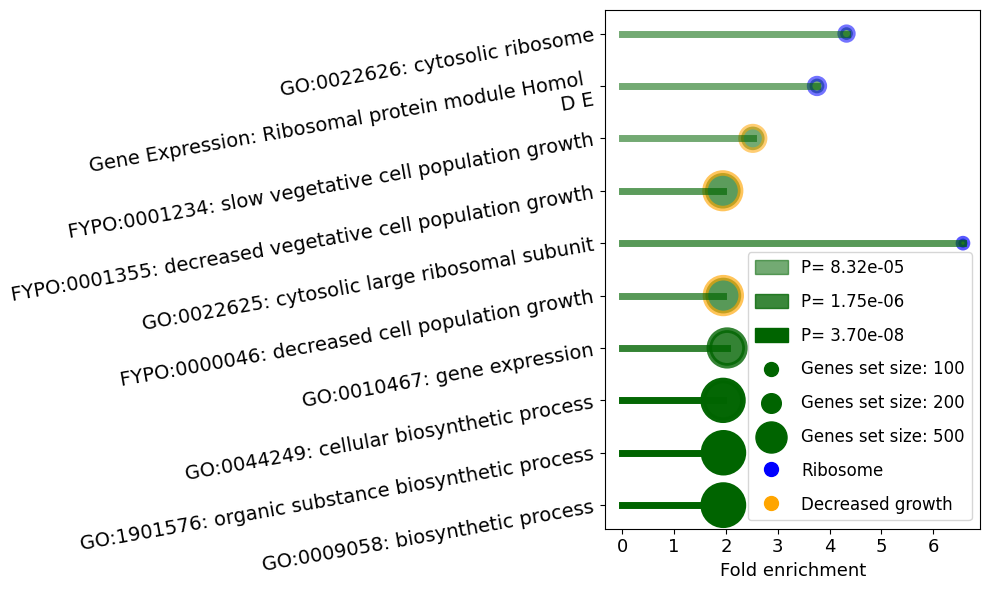

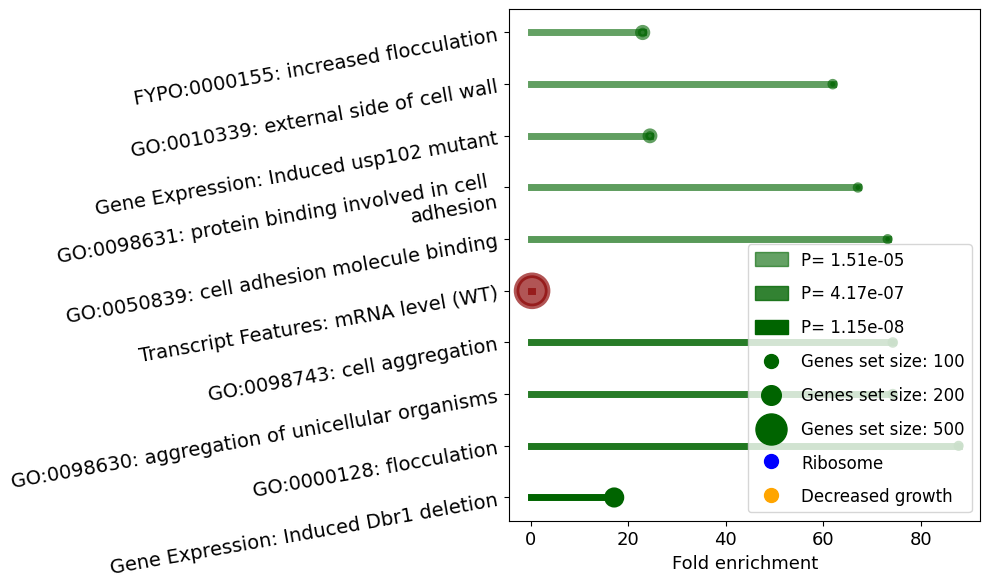

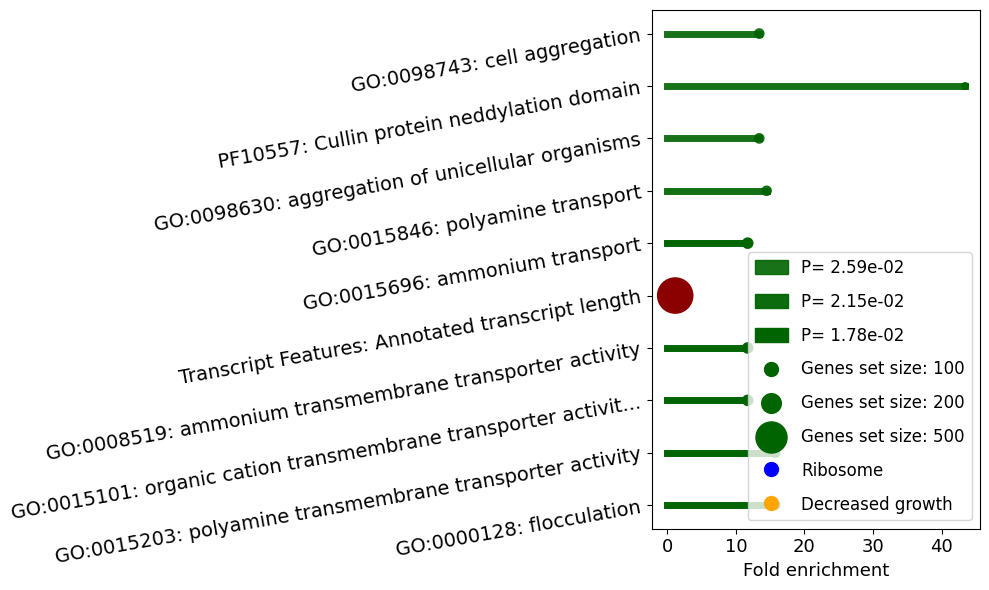

In [3]:
angeli_function(root + "Bence folder/Angeli/angeli/bioneer_angeli_results_recent.txt","bioneer")
angeli_function(root + "Bence folder/Angeli/angeli/cdk8_angeli_results_recent.txt","cdk8")
angeli_function(root + "Bence folder/Angeli/angeli/filter_corr_angeli_recent.txt", "floc")

In [4]:
%load_ext watermark
%watermark


Last updated: 2023-11-05T10:20:17.813250+00:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.31.1

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [5]:
%watermark --iversions



pandas         : 1.4.4
dataframe_image: 0.1.10
numpy          : 1.23.4
matplotlib     : 3.8.0

